# Zwift Training (ZT) Tutorial

Welcome to this little Zwift training companion tool. There are two notebooks in this repository. This notebook is used to show off all the features of ZT, while the other notebook is can be used for daily monitoring of your training.

Let's get started with the tutorial.

*(disclaimer: this work is not in any way associated with Zwift Inc. I just use the name because it makes sense)*

## Installation

```
$ pip3 install -r requirements.txt
```

## Initialization

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import os
import pandas as pd

Import `ZwiftTraining` from ztraining module.

In [3]:
from ztraining import ZwiftTraining

## Creating new Zwift Training Profile

Create JSON file with the following content:

```
{
	"zwift-user": "joe@example.com",
	"zwift-password": "s3cret",
	"dir": "path/to/where/to/store/data"
}
```

The description of the fields are as follows:


#### `zwift-user`

- Email to login to Zwift.
- If this field is empty, we won't interact with online Zwift account (you can still use it to manage activities by importing TCX/GPX/FIT files)

#### `zwift-password`

- Password to login to Zwift

#### `dir` 

- Specify alternate directory to store profile and training data. Default value: `my-ztraining-data` (in current directory) if not specified.

**Hint:** I put it on Google Drive so I can access it from different computers.

Store it to a file, for example `benny.json`, and specify it when creating `ZwiftTraining` object:

In [4]:
zt = ZwiftTraining('benny.json')

Zwift user: benny.prijono@gmail.com
Profile data directory: /home/bennylp/Desktop/Google Drive/My Drive/Personal/Cycling/zwift_training_2


Now we're ready to interact with online Zwift account.

## Updating Zwift Profile and Statistics

Your Zwift profile contains things such as current FTP, level, XPs, drops, total distance, time, elevation, etc for cycling and running. The `zwift_update()` method fetches the profile from online Zwift account and stores it when it changes from the latest one in our stored history. You need to call this periodically, especially after any changes in your profile statistics, such as after finishing an activity, purchasing something from the drop shop, etc. Calling this periodically updates the profile history that you can nicely display later.

Let's update the profile.

In [4]:
zt.zwift_update()

Zwift local profile updated


1

This is your profile information (it's a Pandas Series, hence you can access the item like a dictionary):

In [4]:
zt.profile_info

dtime                2020-08-29 18:52:20
cycling_level                      21.51
cycling_distance                 1892.38
cycling_elevation                  22328
cycling_calories                     NaN
cycling_xp                         83080
cycling_drops                     354244
ftp                                  192
weight                                83
running_level                       2.73
running_distance                   8.915
running_minutes                       95
running_xp                          1732
running_calories                     336
Name: 80, dtype: object

You can calculate the XPs required to level up:

In [5]:
cycling_level = int(zt.profile_info["cycling_level"])
xp_required = zt.get_cycling_level_xp(cycling_level+1) - zt.profile_info['cycling_xp']

print(f'Your cycling level is {cycling_level}')
print(f'You need {xp_required} XPs to level up')

Your cycling level is 21
You need 4920 XPs to level up


If you've used ZT for a while and updated your profile periodically, your profile history can be retrieved as follows. This will return a DataFrame.

In [6]:
zt.profile_history.tail(5)

,dtime,cycling_level,cycling_distance,cycling_elevation,cycling_calories,cycling_xp,cycling_drops,ftp,weight,running_level,running_distance,running_minutes,running_xp,running_calories
76,2020-08-27 17:26:30,21.27,1815.025,21177,NaN,80655,460131,192,83.0,2.73,8.915,95.0,1732.0,336.0
77,2020-08-28 09:54:29,21.27,1815.025,21177,NaN,80655,282531,192,83.0,2.73,8.915,95.0,1732.0,336.0
78,2020-08-28 18:00:18,21.38,1855.767,21477,NaN,81755,313872,192,83.0,2.73,8.915,95.0,1732.0,336.0
79,2020-08-29 17:52:49,21.50,1892.383,22328,NaN,83030,354244,192,83.0,2.73,8.915,95.0,1732.0,336.0
80,2020-08-29 18:52:20,21.51,1892.383,22328,NaN,83080,354244,192,83.0,2.73,8.915,95.0,1732.0,336.0


As you can see, each row contains a profile statistic, and the `zt.profile_info` is simply the latest data in the profile history.

## Profile History Plots

Once you've accumulated some history, you can plot the progress of each field per certain interval. For example, to display your weekly cycling distance:

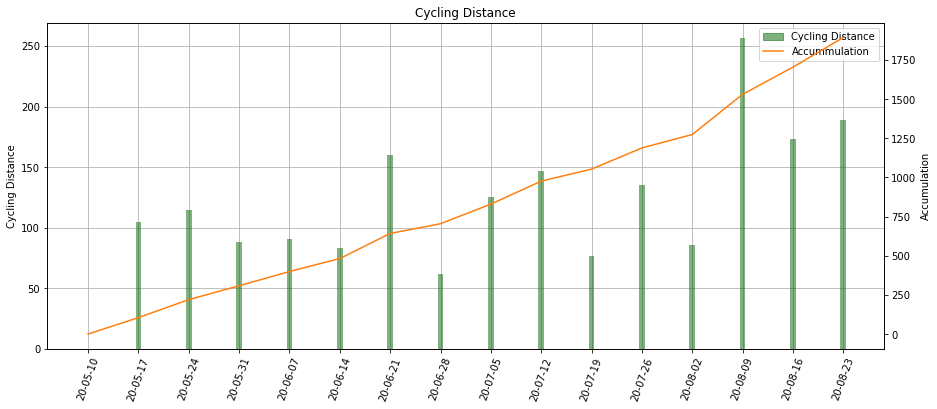

In [7]:
zt.plot_profile_history('cycling_distance', interval='W-SUN')

Another example, to display your daily XPs earnings in August 2020:

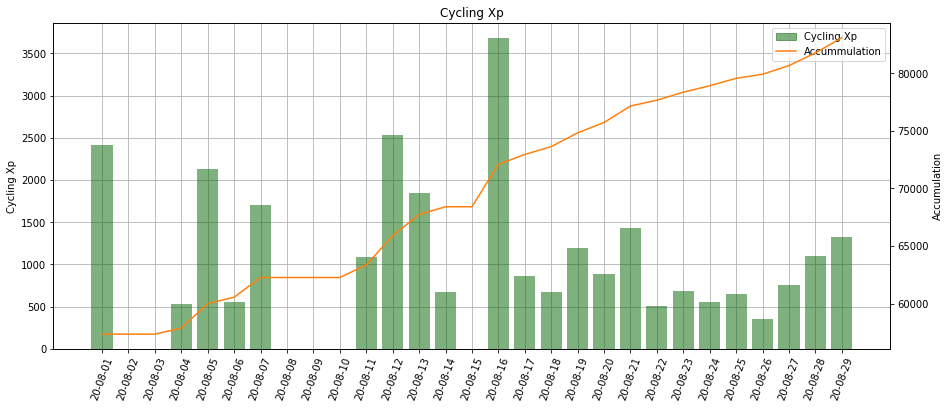

In [8]:
zt.plot_profile_history('cycling_xp', interval='D', 
                        from_dtime='2020-08-01', to_dtime='2020-08-31')

For the **drops**, the plot will be rather interesting since the value can go up or down (it goes down when you're making a purchase in the drop shop).

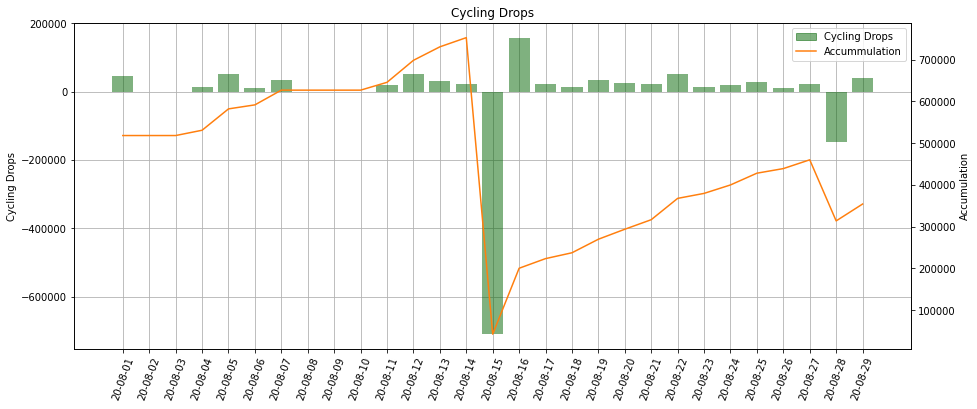

In [9]:
zt.plot_profile_history('cycling_drops', interval='D', 
                        from_dtime='2020-08-01', to_dtime='2020-08-31')

All of these plots only use your profile history information. You can do a lot more once you've importd your activities.

## Importing Zwift Activities from Zwift

Activities need to be parsed and saved to local CSV files before they can be analyzed. ZT can import activities from online Zwift account and/or from local TCX/GPX/FIT files.  In this section we'll demonstrate importing the activities from online Zwift account.

First let's list the activities that we have in our **Zwift online** account, to make sure that ZT can see your activities correctly.

In [10]:
adf = zt.zwift_list_activities(start=0, max=10)
adf

,dtime,sport,title,route,bike,wheel,note,calories,id,duration,distance,elevation,power_avg
0,2020-08-29 15:42:57,cycling,Zwift - Base training,,,,,884.1,627316545882719152,0 days 02:01:44.537000,36.5,851.6,127.8
1,2020-08-29 15:42:42,cycling,Zwift - 08/29/2020,,,,,0.0,627316417137059072,0 days 00:00:00,0.0,0.0,0.0
2,2020-08-29 15:40:21,cycling,Zwift - 08/29/2020,,,,,0.0,627315235509872896,0 days 00:00:00,0.0,0.0,0.0
3,2020-08-28 15:32:55,cycling,Zwift - Base training,,,,,758.3,626586721278075344,0 days 01:59:23.556000,40.7,300.5,121.9
4,2020-08-28 15:32:44,cycling,Zwift - 08/28/2020,,,,,0.0,626586628860780896,0 days 00:00:00,0.0,0.0,0.0
5,2020-08-28 15:32:33,cycling,Zwift - 08/28/2020,,,,,0.0,626586532659699008,0 days 00:00:00,0.0,0.0,0.0
6,2020-08-27 15:55:22,cycling,Zwift - Tempo,,,,,543.6,625873241596071200,0 days 01:18:19.599000,33.1,101.8,133.8
7,2020-08-27 15:55:06,cycling,Zwift - 08/27/2020,,,,,0.0,625873106153606288,0 days 00:00:00,0.0,0.0,0.0
8,2020-08-27 15:54:40,cycling,Zwift - 08/27/2020,,,,,0.0,625872887202023984,0 days 00:00:00,0.0,0.0,0.0
9,2020-08-26 16:17:01,cycling,Zwift - Benny Prijono's Meetup - R.G.V.,,,,,246.2,625159358930528720,0 days 00:38:56.677000,17.6,119.0,113.9


In Zwift online, the last activity is displayed first.

We can also parse online Zwift activity without actually saving it locally:

In [11]:
activity_id = adf['id'].iloc[0]

df, meta = zt.parse_zwift_activity(activity_id)

print('')
for key, val in meta.items():
    print(f'{key:20s}: {val}')

print('\nActivity data:')
display(df)

Getting activity Zwift - Base training (2020-08-29 15:42:57)

dtime               : 2020-08-29 15:42:57
sport               : cycling
title               : Zwift - Base training
src_file            : 627316545882719152.zwift
route               : 
bike                : 
wheel               : 
note                : 
distance            : 36.514
duration            : 0 days 02:00:10
mov_duration        : 0 days 01:59:56
elevation           : 813.8
speed_avg           : 18.3
speed_max           : 86.3
hr_avg              : 133.54
hr_max              : 148.0
power_avg           : 127.91
power_max           : 196.0
cadence_avg         : 72.81
cadence_max         : 88.0
temp_avg            : nan
temp_max            : nan
calories            : 884.1

Activity data:


,dtime,duration,mov_duration,latt,long,elevation,movement,distance,hr,cadence,speed,power,temp
0,2020-08-29 15:42:49,0.0,0,-11.636851,166.971959,13.0,1.04,0.001,88.0,63.0,3.74,40.0,NaN
1,2020-08-29 15:42:50,1.0,1,-11.636856,166.971949,13.0,1.24,0.002,88.0,63.0,4.10,40.0,NaN
2,2020-08-29 15:42:51,2.0,2,-11.636862,166.971938,13.0,1.39,0.004,88.0,63.0,4.40,40.5,NaN
3,2020-08-29 15:42:52,3.0,3,-11.636869,166.971924,13.0,1.70,0.005,88.0,63.0,5.20,41.0,NaN
4,2020-08-29 15:42:53,4.0,4,-11.636877,166.971910,13.0,1.83,0.007,88.0,62.5,5.90,41.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7206,2020-08-29 17:42:55,7206.0,7192,-11.642588,166.974042,43.2,2.45,36.506,133.0,55.0,8.74,110.0,NaN
7207,2020-08-29 17:42:56,7207.0,7193,-11.642608,166.974051,43.4,2.39,36.509,133.0,53.0,8.54,104.5,NaN
7208,2020-08-29 17:42:57,7208.0,7194,-11.642626,166.974059,43.4,2.12,36.511,133.0,53.0,8.35,74.0,NaN
7209,2020-08-29 17:42:58,7209.0,7195,-11.642642,166.974066,43.6,2.01,36.513,133.0,53.0,7.82,62.5,NaN


Once we're satisfied that things are displayed okay, we import Zwift activities by calling `zwift_update()` with `max` parameter set to nonzero.

Here's what `zwift_update()` does.

In [12]:
help(zt.zwift_update)

Help on method zwift_update in module ztraining.ztraining:

zwift_update(start=0, max=0, batch=10, from_dtime=None, to_dtime=None, profile=True, overwrite=False, quiet=False) method of ztraining.ztraining.ZwiftTraining instance
    Update local profile and statistics and optionally scan and update new activities 
    from the online Zwift account.
    
    Parameters:
    - start:      Start number of activity index to import (zero is the latest) 
    - max:        Maximum number of activities to scan.
    - batch:      How many activities to scan from Zwift website for each loop
    - from_dtime: Only import activities from this datetime. We still have to scan
                  the activities one by one starting from the latest activity,
                  so the start and max parameters are still used.
    - to_dtime:   Only import activities older than this datetime.
    - profile:    True to check for profile updates.
    - overwrite:  True to force overwriting already saved activit

The main parameters to specify are `start` and `max`. If you already have many activities, you can tweak these two parameters to import all of your activities efficiently.

Let's import some activities.

In [14]:
zt.zwift_update(start=0, max=50)

Zwift local profile is up to date (last update: 2020-07-01 10:16:29)
Querying start: 0, limit: 10
Fetched 10 activities metadata
Found activity 0: Watopia (2020-07-01 08:49:17) (id: 584346566409622112)
Getting activity Watopia (2020-07-01 08:49:17)
Found activity 1: Zwift - Volcano laps (2020-06-27 06:39:35) (id: 581382235002805376)
Getting activity Zwift - Volcano laps (2020-06-27 06:39:35)
Found activity 2: Zwift - Watopia (2020-06-26 05:49:18) (id: 580632099939204688)
Getting activity Zwift - Watopia (2020-06-26 05:49:18)
Found activity 3: Zwift - Yorkshire (2020-06-24 07:10:37) (id: 579223480630814016)
Getting activity Zwift - Yorkshire (2020-06-24 07:10:37)
Found activity 4: Zwift - Watopia (2020-06-22 06:32:29) (id: 577754733285054560)
Getting activity Zwift - Watopia (2020-06-22 06:32:29)
Found activity 5: Zwift - 06/20/2020 (2020-06-20 07:46:19) (id: 576342344975089968)
Getting activity Zwift - 06/20/2020 (2020-06-20 07:46:19)
Found activity 6: Zwift (2020-06-19 08:44:04) (id: 

Import error: error parsing activity index: 10, id: 571221983410296688, datetime: 2020-06-13 06:13:04, title: "Zwift - 06/13/2020", duration: 0: FitParseError: Got data message with invalid local message type 2 


Found activity 11: Zwift - M3065. MAF Rest Day (2020-06-13 05:29:24) (id: 571200003319567024)
Getting activity Zwift - M3065. MAF Rest Day (2020-06-13 05:29:24)
Found activity 12: Zwift - M7070. 1:10H 70%  MAF (2020-06-12 06:50:35) (id: 570516090740903040)
Getting activity Zwift - M7070. 1:10H 70%  MAF (2020-06-12 06:50:35)
Found activity 13: Zwift - M7570. 1:15H 70% MAF (2020-06-10 05:54:06) (id: 569038103910652800)
Getting activity Zwift - M7570. 1:15H 70% MAF (2020-06-10 05:54:06)
Found activity 14: Zwift - M7070. 1:10H 70%  MAF (2020-06-08 07:12:13) (id: 567627875689211152)
Getting activity Zwift - M7070. 1:10H 70%  MAF (2020-06-08 07:12:13)
Found activity 15: Zwift - 06/06/2020 (2020-06-06 07:19:31) (id: 566181999841215872)
Getting activity Zwift - 06/06/2020 (2020-06-06 07:19:31)


Import error: error parsing activity index: 15, id: 566181999841215872, datetime: 2020-06-06 07:19:31, title: "Zwift - 06/06/2020", duration: 0: FitParseError: Got data message with invalid local message type 2 


Found activity 16: Zwift - M6070. 1H 70%  MAF (2020-06-06 05:54:54) (id: 566139406180780368)
Getting activity Zwift - M6070. 1H 70%  MAF (2020-06-06 05:54:54)
Found activity 17: Zwift Run - Up and Down 1 (Easy) (2020-06-04 06:52:06) (id: 564718646962272976)
Getting activity Zwift Run - Up and Down 1 (Easy) (2020-06-04 06:52:06)
Found activity 18: Zwift - M6065. 1H 65%  MAF (2020-06-02 06:13:05) (id: 563249452894528128)
Getting activity Zwift - M6065. 1H 65%  MAF (2020-06-02 06:13:05)
Found activity 19: Zwift - 06/01/2020 (2020-06-01 12:43:21) (id: 562721110419708560)
Getting activity Zwift - 06/01/2020 (2020-06-01 12:43:21)


Import error: error parsing activity index: 19, id: 562721110419708560, datetime: 2020-06-01 12:43:21, title: "Zwift - 06/01/2020", duration: 0: FitParseError: Got data message with invalid local message type 2 


Found activity 20: Zwift - B2. 70% (2020-06-01 10:03:39) (id: 562640731556056336)
Getting activity Zwift - B2. 70% (2020-06-01 10:03:39)
Found activity 21: Zwift - B1. 70%  with Warmup (2020-06-01 09:09:31) (id: 562613479621400272)
Getting activity Zwift - B1. 70%  with Warmup (2020-06-01 09:09:31)
Found activity 22: Zwift - 1H 40% Recovery Interval (2020-05-31 08:23:36) (id: 561865596899801088)
Getting activity Zwift - 1H 40% Recovery Interval (2020-05-31 08:23:36)
Found activity 23: Zwift - Richmond (2020-05-30 07:54:33) (id: 561126198099076336)
Getting activity Zwift - Richmond (2020-05-30 07:54:33)
Found activity 24: 1H 75%  Low Tempo Interval (2020-05-30 07:01:24) (id: 561099500420478896)
Getting activity 1H 75%  Low Tempo Interval (2020-05-30 07:01:24)
Found activity 25: Zwift - 1H 40-75% Interval (2020-05-30 06:24:28) (id: 561080855340801792)
Getting activity Zwift - 1H 40-75% Interval (2020-05-30 06:24:28)
Found activity 26: Zwift - 1H 40% Recovery Interval (2020-05-30 06:05:48

Import error: error parsing activity index: 33, id: 557068593913759280, datetime: 2020-05-24 17:32:49, title: "Zwift - 05/24/2020", duration: 0: FitParseError: Got data message with invalid local message type 2 


Found activity 34: Long Tempo (2020-05-24 16:36:52) (id: 557040434648562528)
Getting activity Long Tempo (2020-05-24 16:36:52)
Found activity 35: 10-12wk FTP Builder Week 1 (Skip if you are in shape) Day 1 (2020-05-22 16:28:37) (id: 555586728736438288)
Getting activity 10-12wk FTP Builder Week 1 (Skip if you are in shape) Day 1 (2020-05-22 16:28:37)
Found activity 36: Fondo - The Long Ride (2020-05-21 16:32:36) (id: 554863960222972400)
Getting activity Fondo - The Long Ride (2020-05-21 16:32:36)
Found activity 37: Fondo - Introductory Intervals (2020-05-19 16:27:04) (id: 553411626219106000)
Getting activity Fondo - Introductory Intervals (2020-05-19 16:27:04)
Found activity 38: Fondo - Welcome Workout (2020-05-18 16:23:58) (id: 552685460428454048)
Getting activity Fondo - Welcome Workout (2020-05-18 16:23:58)
Found activity 39: Zwift - 05/17/2020 (2020-05-17 09:34:01) (id: 551754177019150928)
Getting activity Zwift - 05/17/2020 (2020-05-17 09:34:01)


Import error: error parsing activity index: 39, id: 551754177019150928, datetime: 2020-05-17 09:34:01, title: "Zwift - 05/17/2020", duration: 0: FitParseError: Got data message with invalid local message type 2 


Querying start: 40, limit: 50
Fetched 0 activities metadata


35

Don't worry about the import errors. It happens when we try to import empty activities, i.e. activities that you've done but didn't save.

## Importing TCX, GPX, and FIT Files

If you want to be able to calculate power curves for activities not from Zwift, you can import them to ZT by specifying a specific file to import or a directory to scan for TCX/GPX/FIT files.

By default, the import functions will not import the file if data from the same filename (excluding the path) already exists in the activity list.

In [16]:
help(zt.import_files)

Help on method import_files in module ztraining.ztraining:

import_files(dir, max=None, from_dtime=None, to_dtime=None, overwrite=False, quiet=False) method of ztraining.ztraining.ZwiftTraining instance



In [15]:
help(zt.import_activity_file)

Help on method import_activity_file in module ztraining.ztraining:

import_activity_file(path, sport=None, overwrite=False, quiet=False) method of ztraining.ztraining.ZwiftTraining instance



Use `parse_file()` to just parse the activity file without importing it:

In [19]:
df, meta = ZwiftTraining.parse_file('tests/tcx_gpx_fit_files/102574211.tcx')
print('')
for k, v in meta.items():
    print(f'{k:20s}: {v}')
print('\nData:')
display(df)


dtime               : 2013-11-09 05:04:11
sport               : cycling
title               : 
src_file            : 102574211.tcx
distance            : 215.072
duration            : 0 days 10:39:43
mov_duration        : 0 days 07:58:23
elevation           : 2243.0
speed_avg           : 27.0
speed_max           : 56.5
hr_avg              : 144.49
hr_max              : 193.0
power_avg           : 121.41
power_max           : 561.5
cadence_avg         : 80.3
cadence_max         : 122.0
temp_avg            : nan
temp_max            : nan

Data:


,dtime,duration,mov_duration,latt,long,elevation,movement,distance,hr,cadence,speed,power,temp
0,2013-11-09 05:04:11,0.0,0,-8.763816,115.170127,21.4,4.020,0.004,117.0,56.0,14.47,129.0,NaN
1,2013-11-09 05:04:12,1.0,1,-8.763776,115.170131,21.4,4.150,0.008,117.5,57.0,14.71,123.5,NaN
2,2013-11-09 05:04:13,2.0,2,-8.763734,115.170134,21.4,4.410,0.013,119.0,60.0,15.10,125.5,NaN
3,2013-11-09 05:04:14,3.0,3,-8.763689,115.170131,21.4,4.620,0.017,121.0,63.5,15.82,120.0,NaN
4,2013-11-09 05:04:15,4.0,4,-8.763642,115.170130,21.4,4.810,0.022,122.5,66.0,16.61,110.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28726,2013-11-09 15:43:50,38379.0,28699,-8.154801,115.037233,67.0,2.906,215.061,107.0,8.0,9.47,50.5,NaN
28727,2013-11-09 15:43:51,38380.0,28700,-8.154811,115.037248,67.0,2.953,215.064,107.0,24.0,10.16,46.5,NaN
28728,2013-11-09 15:43:52,38381.0,28701,-8.154815,115.037259,67.0,2.797,215.067,107.0,32.0,10.39,29.5,NaN
28729,2013-11-09 15:43:53,38382.0,28702,-8.154814,115.037258,66.8,2.828,215.070,107.0,24.0,10.29,0.0,NaN


## Working with Activities

A single activity contains two data:
- the meta-data (time, distance, avg/max hr, etc.)
- activity data (each individual point such as GPS location, elevation, HR, power, etc., sampled per second) as DataFrame.

We'll demonstrate how to work with both data.

Use `get_activities()` method to get the list of activities meta-data (as DataFrame):

In [20]:
help(zt.get_activities)

Help on method get_activities in module ztraining.ztraining:

get_activities(from_dtime=None, to_dtime=None, sport=None) method of ztraining.ztraining.ZwiftTraining instance



In [13]:
zt.get_activities().tail(5)

,dtime,sport,title,src_file,route,bike,wheel,note,distance,duration,...,speed_max,hr_avg,hr_max,power_avg,power_max,cadence_avg,cadence_max,temp_avg,temp_max,calories
533,2020-08-25 14:42:52,cycling,Zwift - Off The MAAP Stage 4 Race (D),624387199752768192.zwift,NaN,NaN,NaN,NaN,32.890,0 days 01:16:10,...,84.6,152.19,171.0,163.91,402.5,77.37,119.0,NaN,NaN,798.9
534,2020-08-26 16:17:01,cycling,Zwift - Benny Prijono's Meetup - R.G.V.,625159358930528720.zwift,NaN,NaN,NaN,NaN,17.583,0 days 00:38:04,...,46.2,115.46,132.5,114.35,146.5,NaN,0.0,NaN,NaN,246.2
535,2020-08-27 15:55:22,cycling,Zwift - Tempo,625873241596071200.zwift,NaN,NaN,NaN,NaN,33.104,0 days 01:10:26,...,54.1,131.68,145.0,135.13,167.0,62.76,67.0,NaN,NaN,543.6
536,2020-08-28 15:32:55,cycling,Zwift - Base training,626586721278075344.zwift,NaN,NaN,NaN,NaN,40.732,0 days 01:47:24,...,64.6,129.25,141.0,125.40,208.0,75.99,110.0,NaN,NaN,758.3
537,2020-08-29 15:42:57,cycling,Zwift - Base training,627316545882719152.zwift,NaN,NaN,NaN,NaN,36.514,0 days 02:00:10,...,86.3,133.54,148.0,127.91,196.0,72.81,88.0,NaN,NaN,884.1


Each activity contains meta-data like the following. For example, this is the meta-data of the last activity.

In [8]:
last_activity = zt.get_activities().iloc[-1]
last_activity

dtime                2020-08-29 15:42:57
sport                            cycling
title              Zwift - Base training
src_file        627316545882719152.zwift
route                                NaN
bike                                 NaN
wheel                                NaN
note                                 NaN
distance                          36.514
duration                 0 days 02:00:10
mov_duration             0 days 01:59:56
elevation                          813.8
speed_avg                           18.3
speed_max                           86.3
hr_avg                            133.54
hr_max                               148
power_avg                         127.91
power_max                            196
cadence_avg                        72.81
cadence_max                           88
temp_avg                             NaN
temp_max                             NaN
calories                           884.1
Name: 537, dtype: object

## Plotting Activity Statistics

You can plot the field in the activities grouped by time such as daily, weekly, monthly, yearly, etc. The field that can be displayed are:
- `distance`
- `elevation`
- `calories`
- `duration`
- `mov_duration`, and 
- `tss`, 


Full complete reference for `interval` is in this [Pandas doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases). Useful values are:
- `D`: daily
- `W` or `W-SUN`: weekly (Sunday)
- `W-MON`: weekly (Monday)
- `MS`: month (label is start date)
- `YS`: year (label is start date)

For example, this is the weekly TSS:

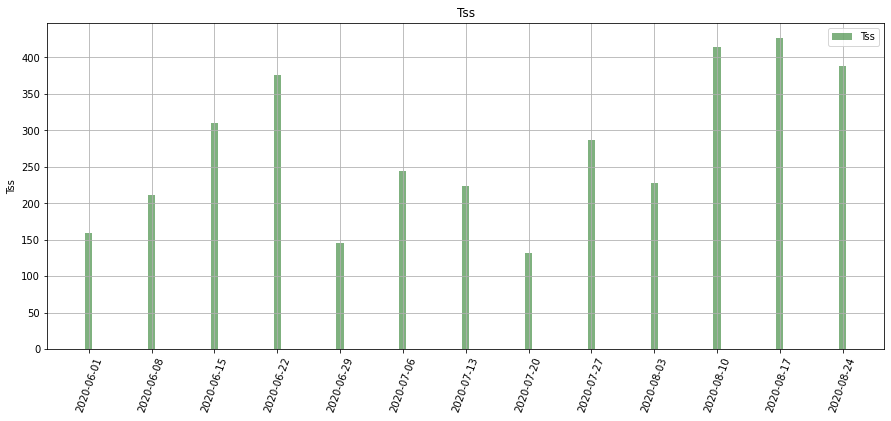

In [40]:
zt.plot_activities('tss', interval='W-MON', sport='cycling',
                   from_dtime='2020-06-01', to_dtime='2020-08-31')

This is monthly cycling distance:

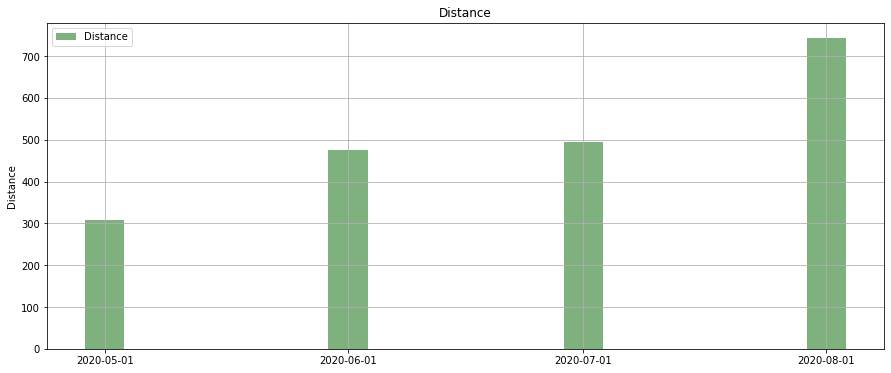

In [41]:
zt.plot_activities('distance', interval='MS', sport='cycling',
                   from_dtime='2020-01-01', to_dtime='2020-12-31')

Weekly duration for all sports:

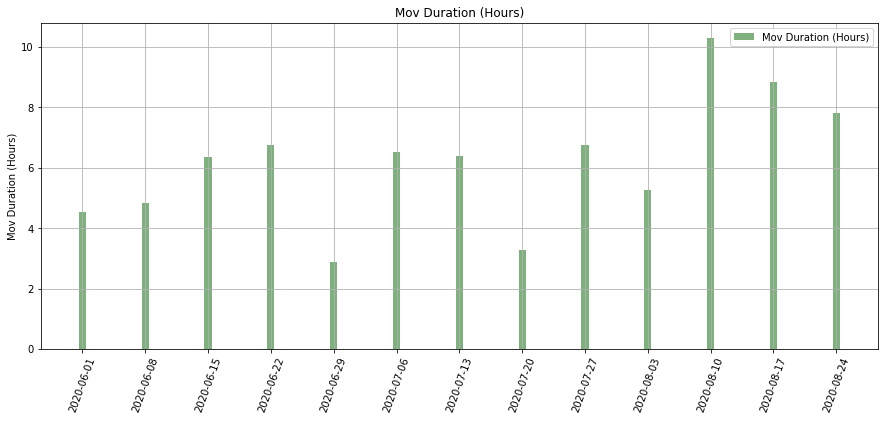

In [44]:
zt.plot_activities('mov_duration', interval='W-MON', 
                   from_dtime='2020-06-01', to_dtime='2020-08-31')

## Activity Details (Data)

You can get the activity data as DataFrame by specifying either/both the dtime or `src_file`. The `src_file` is the original file that the activity was imported from. For Zwift activities, it has `.zwift` extension.

Let's retrieve the data of the last activity (we have saved `last_activity` above)

In [45]:
zt.get_activity_data(dtime=last_activity['dtime'])

,dtime,duration,mov_duration,latt,long,elevation,movement,distance,hr,cadence,speed,power,temp
0,2020-08-29 15:42:49,0.0,0,-11.636851,166.971959,13.0,1.04,0.001,88.0,63.0,3.74,40.0,NaN
1,2020-08-29 15:42:50,1.0,1,-11.636856,166.971949,13.0,1.24,0.002,88.0,63.0,4.10,40.0,NaN
2,2020-08-29 15:42:51,2.0,2,-11.636862,166.971938,13.0,1.39,0.004,88.0,63.0,4.40,40.5,NaN
3,2020-08-29 15:42:52,3.0,3,-11.636869,166.971924,13.0,1.70,0.005,88.0,63.0,5.20,41.0,NaN
4,2020-08-29 15:42:53,4.0,4,-11.636877,166.971910,13.0,1.83,0.007,88.0,62.5,5.90,41.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,2020-08-29 17:42:55,7206.0,7192,-11.642588,166.974042,43.2,2.45,36.506,133.0,55.0,8.74,110.0,NaN
7193,2020-08-29 17:42:56,7207.0,7193,-11.642608,166.974051,43.4,2.39,36.509,133.0,53.0,8.54,104.5,NaN
7194,2020-08-29 17:42:57,7208.0,7194,-11.642626,166.974059,43.4,2.12,36.511,133.0,53.0,8.35,74.0,NaN
7195,2020-08-29 17:42:58,7209.0,7195,-11.642642,166.974066,43.6,2.01,36.513,133.0,53.0,7.82,62.5,NaN


## Plotting an Activity

Plot nice charts about an activity.

In [57]:
help(zt.plot_activity)

Help on method plot_activity in module ztraining.ztraining:

plot_activity(dtime=None, src_file=None, x='distance') method of ztraining.ztraining.ZwiftTraining instance



Zwift - Base training


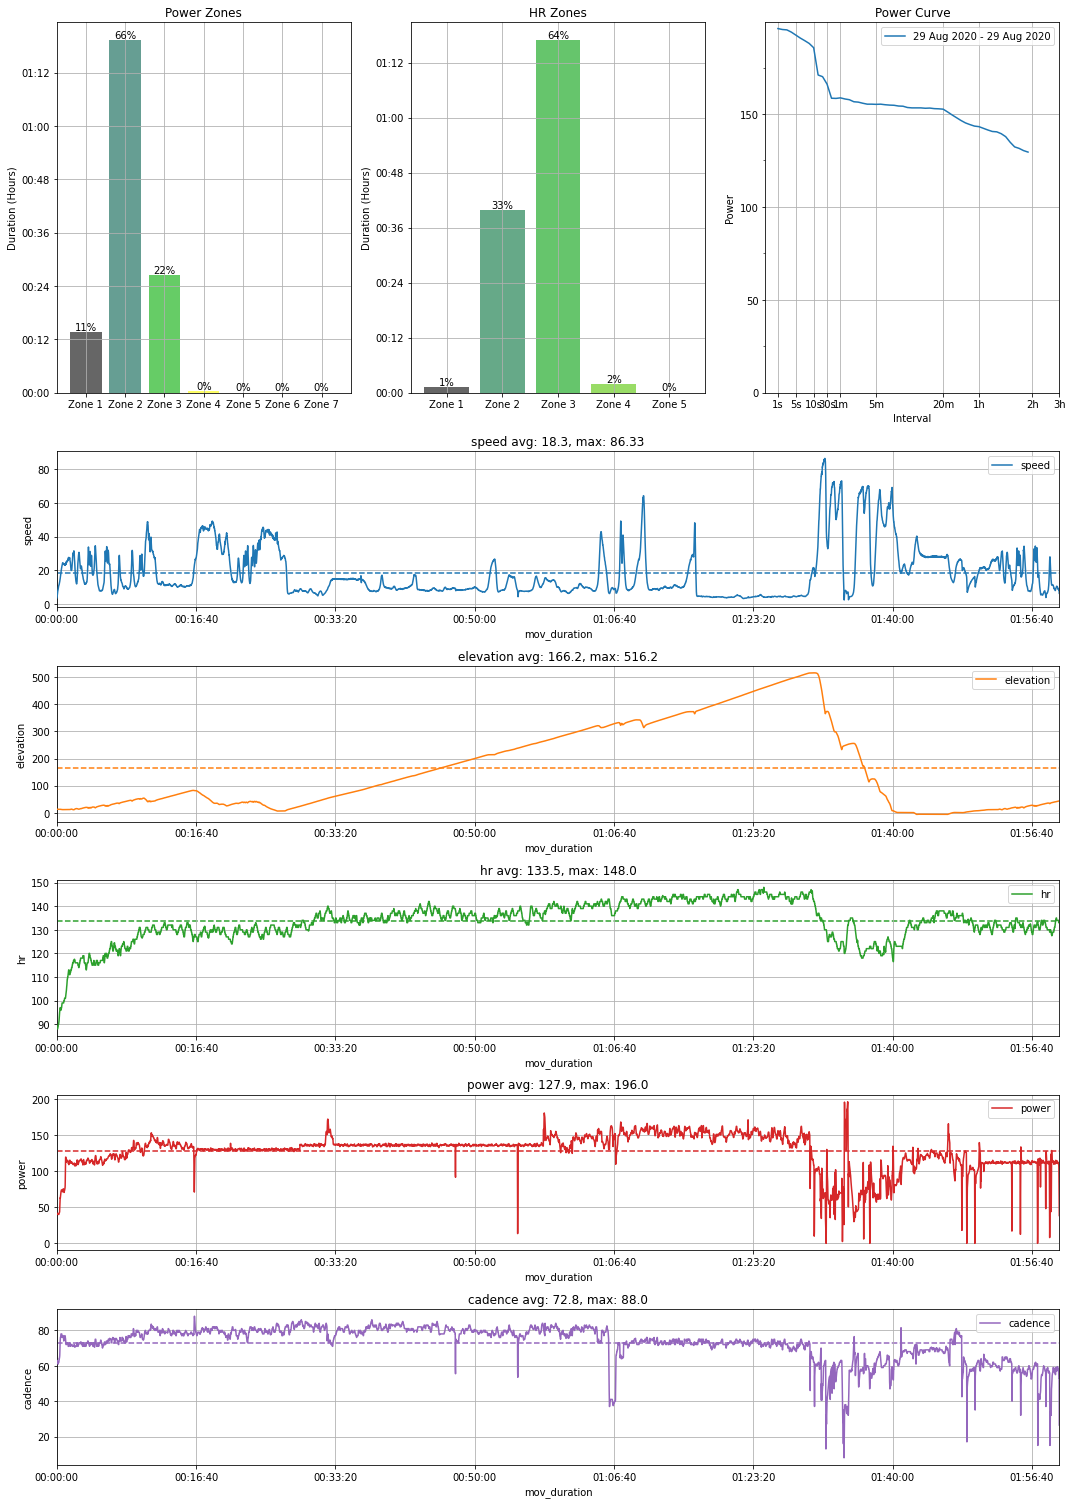

In [46]:
zt.plot_activity(dtime=last_activity["dtime"], x='mov_duration')

## Deleting an Activity

You may need to delete some activities, most likely because of duplication (for example, you import the activity from both Zwift account and manually from files). You can do it with:

In [24]:
help(zt.delete_activity)

Help on method delete_activity in module ztraining.ztraining:

delete_activity(dtime=None, src_file=None, dry_run=False) method of ztraining.ztraining.ZwiftTraining instance



## Power Zones

In [10]:
help(zt.plot_power_zones_duration)

Help on method plot_power_zones_duration in module ztraining.ztraining:

plot_power_zones_duration(from_dtime, to_dtime, ftp=None, zones=[0.55, 0.75, 0.9, 1.05, 1.2, 1.5], labels=['Active Recovery', 'Endurance', 'Tempo', 'Lactate Threshold', 'VO2Max', 'Anaerobic', 'Neuromoscular'], title=None, ax=None, show=True, label_type='default') method of ztraining.ztraining.ZwiftTraining instance



The `plot_power_zones_duration()` method basically takes the start and end date-time period over which the power zones of the activities will be calculated.

If you want to display the power zone of a single activity, specify the same datetime for both from_dtime/to_dtime arguments.

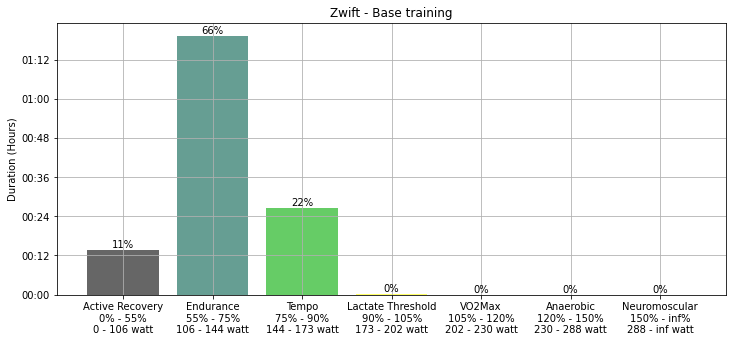

In [9]:
_ = zt.plot_power_zones_duration(last_activity["dtime"], last_activity["dtime"], 
                                 title=last_activity["title"])

And maybe if you want to plot your training power zones for the whole month:

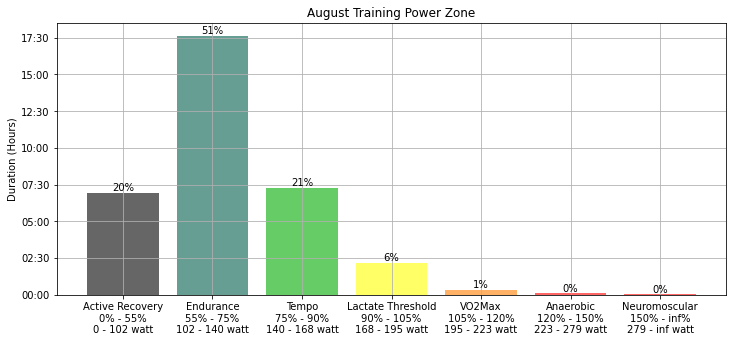

In [12]:
_ = zt.plot_power_zones_duration('2020-08-01', '2020-08-31', 
                                 title='August Training Power Zone')

## Working with Power Zones Data

Use `calc_power_zones_duration()` if you want to work with raw power zones data.

In [18]:
zt.calc_power_zones_duration('2020-08-01', '2020-08-05')

,pct_min,pct_max,power_min,power_max,duration
Active Recovery,0.00,0.55,0,102.0,3659.0
Endurance,0.55,0.75,102,139.0,12167.0
Tempo,0.75,0.90,139,166.0,3907.0
Lactate Threshold,0.90,1.05,166,194.0,181.0
VO2Max,1.05,1.20,194,222.0,12.0
Anaerobic,1.20,1.50,222,278.0,29.0
Neuromoscular,1.50,inf,278,inf,0.0


`pct_min` and `pct_max` is the power range for the zone, in percentage of FTP.

`power_min` and `power_max` is the power range for the zone in watt.

`duration` is the duration spent in the zone, in seconds.

You can specify your own zones if you want to:

In [24]:
help(zt.calc_power_zones_duration)

Help on method calc_power_zones_duration in module ztraining.ztraining:

calc_power_zones_duration(from_dtime, to_dtime, ftp=None, zones=[0.55, 0.75, 0.9, 1.05, 1.2, 1.5], labels=['Active Recovery', 'Endurance', 'Tempo', 'Lactate Threshold', 'VO2Max', 'Anaerobic', 'Neuromoscular']) method of ztraining.ztraining.ZwiftTraining instance



## Heart Rate Zones

This is similar to power zones above. You need to specify your maximum HR for this function.

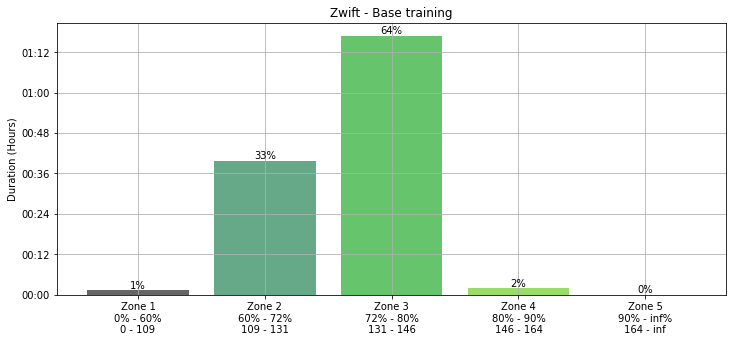

In [22]:
_ = zt.plot_hr_zones_duration(last_activity["dtime"], last_activity["dtime"], 182,
                              title=last_activity["title"])

You can specify your own zones if you want to.

In [25]:
help(zt.plot_hr_zones_duration)

Help on method plot_hr_zones_duration in module ztraining.ztraining:

plot_hr_zones_duration(from_dtime, to_dtime, max_hr, zones=[0.6, 0.72, 0.8, 0.9], labels=['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5'], title=None, ax=None, show=True, label_type='default') method of ztraining.ztraining.ZwiftTraining instance



## Working with Raw HR Zones

In [23]:
zt.calc_hr_zones_duration(last_activity["dtime"], last_activity["dtime"], 182)

,pct_min,pct_max,hr_min,hr_max,duration
Zone 1,0.00,0.60,0,109.0,77
Zone 2,0.60,0.72,109,131.0,2389
Zone 3,0.72,0.80,131,146.0,4616
Zone 4,0.80,0.90,146,164.0,115
Zone 5,0.90,inf,164,inf,0


`pct_min` and `pct_max` is the HR range for the zone, in percentage of max HR.

`hr_min` and `hr_max` is the HR range for the zone.

`duration` is the duration spent in the zone, in seconds.

## Power Curves

One of the useful service provided by ZT is to display the power curve. You can specify arbitrary periods to display the power curves.

In [42]:
help(zt.plot_power_curves)

Help on method plot_power_curves in module ztraining.ztraining:

plot_power_curves(periods, min_interval=None, max_interval=None, max_hr=None, title=None) method of ztraining.ztraining.ZwiftTraining instance



At the very basic setting, you need to specify the date period, over which the training curve will be calculated. Hint: if you need to display power curve of a single activity, specify the same start and end time, i.e. the activity start time.

Let's display the power curve of all activities in August.

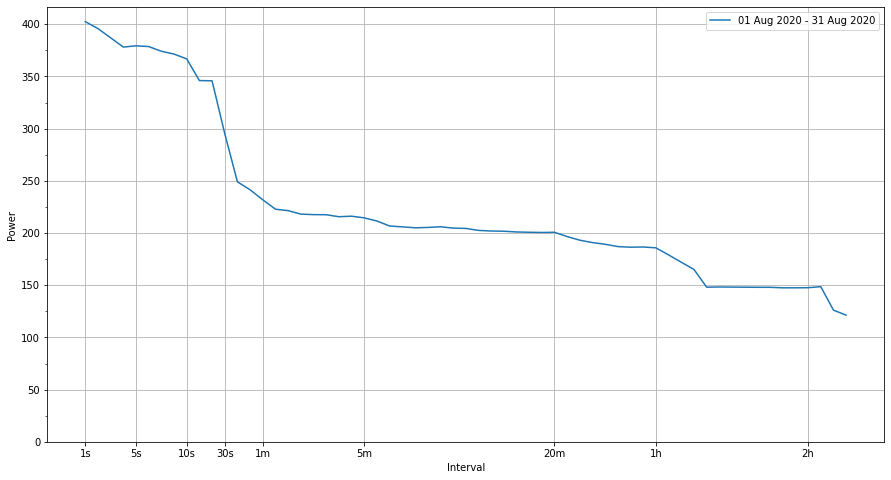

In [8]:
zt.plot_power_curves([('2020-08-01', '2020-08-31')])

As you can see, the function takes the periods as a list. This enables you to compare the power curve across different periods.

If the maximum duration in the power curve is too long, you can limit it with `max_interval` argument.

For example, let's plot the power curve of each month for the last four months.

No power data for period 2020-09-01 00:00:00 - 2020-09-30 00:00:00


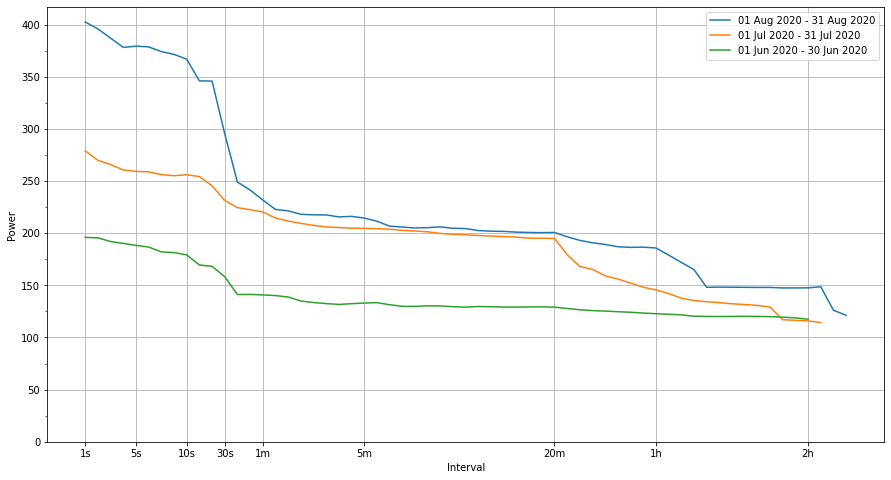

In [10]:
import datetime

monthly_periods = []
start_date = datetime.datetime.now().date()

while len(monthly_periods) < 4:
    start_date = start_date.replace(day=1)
    end_date = (start_date + datetime.timedelta(days=32)).replace(day=1) - \
               datetime.timedelta(days=1)
    monthly_periods.append( (start_date, end_date) )
    start_date -= datetime.timedelta(days=1)

#print(monthly_periods)

zt.plot_power_curves(monthly_periods)

Of course you can throw in arbitrary period into the periods array, for example, the power curve from 2013-2014 period:

No power data for period 2020-09-01 00:00:00 - 2020-09-30 00:00:00


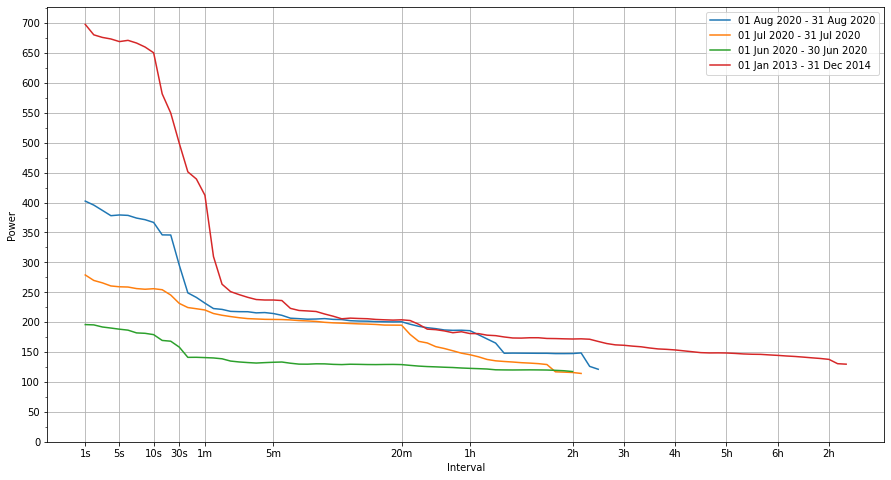

In [11]:
zt.plot_power_curves(monthly_periods + [('2013-01-01', '2014-12-31')])

The `max_hr` argument is useful when say you're following Maffetone method of training with specific maximum heart rate limit. In this case, you can track the power curve progression only when the heart rate is at/below that limit.

No power data for period 2020-09-01 00:00:00 - 2020-09-30 00:00:00


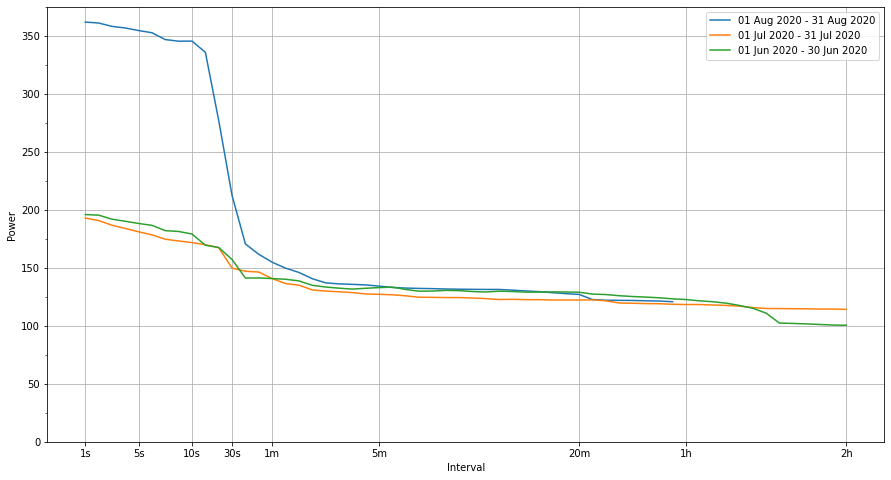

In [12]:
zt.plot_power_curves(monthly_periods, max_hr=130)

## Raw Power Curve Data

Use `calc_power_curve()` method if you need to work with the raw power curve data for each activity. Each row contains a single activity, and the columns are the power curve interval in seconds.

In [5]:
df = zt.calc_power_curve(from_date='2020-08-01', to_date='2020-08-05')
df

,1,2,3,4,5,6,7,8,9,10,...,37800,38400,39000,39600,40200,40800,41400,42000,42600,43200
dtime,,,,,,,,,,,,,,,,,,,,,
2020-08-01 07:55:37,168.5,165.5,163.0,162.1,161.3,161.2,160.6,160.3,160.0,159.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04 06:35:38,58.0,55.8,53.5,52.0,50.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04 06:58:31,149.5,149.2,149.0,149.0,149.0,148.9,148.9,148.8,148.7,148.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-05 06:31:15,255.0,254.5,252.3,250.5,248.8,248.1,248.1,247.6,246.9,246.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hence if you need the power curve data for the period, you just need to get the maximum values for each column:

In [6]:
df.max()

1        255.0
2        254.5
3        252.3
4        250.5
5        248.8
         ...  
40800      NaN
41400      NaN
42000      NaN
42600      NaN
43200      NaN
Length: 143, dtype: float64

## Training Form / Training Stress Balance (TSB)

You can plot the chart of your [Training Form or Training Stress Balance (TSB)](https://help.trainingpeaks.com/hc/en-us/articles/204071764-Form-TSB-):

Current form: 2020-08-30 00:00:00 -2.74


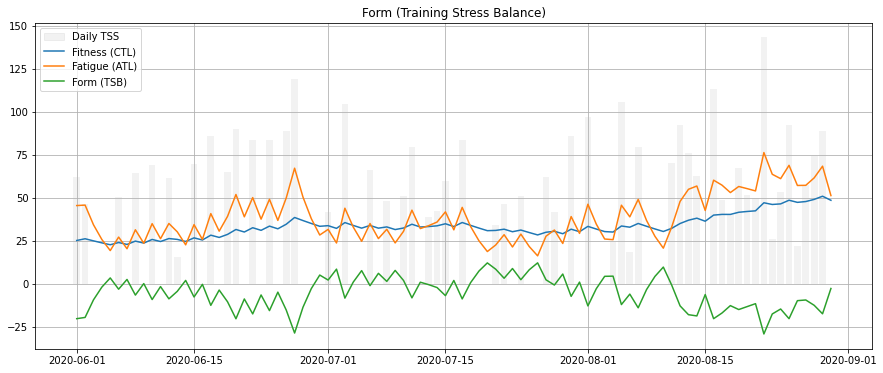

In [26]:
zt.plot_training_form(from_dtime='2020-06-01')

## Working with Raw Training Form / TSB Values


In [27]:
zt.calc_training_form(from_dtime='2020-06-01')

,tss,Fitness (CTL),Fatigue (ATL),Form (TSB)
dtime,,,,
2020-06-01,62.171023,25.156593,45.442513,-20.285920
2020-06-02,46.498552,26.149243,45.706523,-19.557281
2020-06-03,0.000000,24.932999,34.279892,-9.346894
2020-06-04,0.000000,23.773324,25.709919,-1.936595
2020-06-05,0.000000,22.667588,19.282439,3.385149
...,...,...,...,...
2020-08-26,22.001693,47.305993,57.117824,-9.811831
2020-08-27,57.459135,47.778232,57.203152,-9.424920
2020-08-28,74.507956,49.021475,61.529353,-12.507878


## Utility to Display Zwift Workout File (ZWO)

Zwift workout file (ZWO) is an XML file that you can edit with any editor. Once you create or edit it, you can display the contents with ZT. For example:

In [28]:
ZwiftTraining.display_zwo('tests/sample.zwo', ftp=192)

Title      : Tempo 5
Author     : 2 Jelly Legs
Description: Tempo 5 minutes interval
Duration   : 2:04:34
Workouts:


,time,type,duration,repeat,on watt,on duration,on rpm,off watt,off duration,off rpm,cum avg watt,text
0,00:00,freeride,00:32,,0,,,0,,,96,
1,00:32,interval,02:02,2,83,30,,83,31,,85,
2,02:34,interval,02:02,2,93,30,,93,31,,89,
3,04:36,interval,02:02,2,103,30,,103,31,,93,
4,06:38,interval,02:02,2,124,30,85,114,31,65,99,
5,08:40,interval,06:04,4,145,60,100,114,31,80,114,
6,14:44,interval,04:02,2,124,61,,124,60,,116,
7,18:46,interval,14:06,2,153,300,,124,123,,128,
8,32:52,interval,14:06,2,153,300,,124,123,,133,
9,46:58,interval,14:06,2,153,300,,124,123,,136,


Most likely not all ZWO features are supported (see [Zwift workout reference](https://github.com/h4l/zwift-workout-file-reference)). If you encounter any problems please let me know.

## Inventory

Many more features offered by ZT requires knowledge of which routes have been completed and which frames and wheels have been purchased from the drop shop. Such information is not provided by Zwift hence we need to manage them manually.

That's what ZT inventory is for. The inventory is used to save which routes have been completed and what frames and wheels are owned by the user.

To see the contents of the inventory:

In [44]:
zt.get_inventory(kind='wheels')

,type,dtime,name
48,wheels,NaT,32mm Carbon
49,wheels,NaT,ENVE SES 3.4


### Add Completed Route

Once you've got the route badge bonus, you need to put it to the inventory.

First list routes with matching name:

In [46]:
zt.list_inventory('route', 'Lady')

,name,world,route,distance,elevation,lead-in,badge,restriction
41,New York - Lady Liberty,New York,Lady Liberty,12.3,197.0,0.4,240.0,NaN


Then specify the `name` to add the completed route to the inventory.

In [33]:
zt.set_inventory('route', 'New York - Lady Liberty')

### Add Purchased Frame

In [47]:
zt.list_inventory('frame', 'Tarmac Pro')

,name,type,flat time,climb time,price,level
48,Spec. Tarmac Pro,standard,3093,2933,408300,11


In [37]:
zt.set_inventory('frame', 'Spec. Tarmac Pro')

### Add Purchased Wheelset

In [48]:
zt.list_inventory('wheels', '808')

,name,type,flat time,climb time,level,price
21,Zipp 808,-,3043,2971,13,177600
22,Zipp 808/Super9,-,3034,2980,35,1075700


In [50]:
zt.set_inventory('wheels', 'Zipp 808')

wheels Zipp 808 successfully added to inventory


,type,dtime,name
0,route,NaT,France - Douce France
1,route,NaT,France - R.G.V.
2,route,NaT,Watopia - Mountain Route
3,route,NaT,Richmond - Cobbled Climbs
4,route,NaT,Watopia - Road to Sky
...,...,...,...
60,route,2020-08-20 18:33:22,Yorkshire - Duchy Estate
61,route,2020-08-21 10:25:37,Watopia - Flat Route
62,route,2020-08-21 10:25:50,Watopia - Whole Lotta Lava
63,route,2020-08-23 17:59:30,New York - Lady Liberty


## Best Route Suggestion

Another useful feature is to get the best route to take that maximises the XP earnings, given the specified average power (watt) and duration to spend. The function utilises a little bit of machine learning to predict the duration of potential routes, and checks which activity types (free rides or workout interval) that maximises the XP earnings.

This functionality needs an up to date inventory to work correctly (it needs to know the routes that have been completed by the user in order to predict the route XP bonus).

In [44]:
help(zt.best_cycling_route)

Help on method best_cycling_route in module ztraining.ztraining:

best_cycling_route(avg_watt, max_duration, min_duration=None, kind=None, done=None, quiet=False) method of ztraining.ztraining.ZwiftTraining instance



For example, I want to know the best route that maximises the XP earning if I want to spend 45 minutes with 150 average watt. The best route to take is the top most route. 

In [52]:
zt.best_cycling_route('0:45:00', 150)

Training with 20 datapoints from 2020-08-13 16:00:24
Coefs: [('distance', 0.315), ('elevation', 0.07), ('dist/power', 180.371)]
Mean error: 4.8 minutes (7.1%)
Max error : 16.1 minutes (22.0%)


done  total distance  distance  \
world     route                                                               
New York  Astoria Line 8                        0            11.9      11.5   
Watopia   Tempus Fugit                          1            19.7      17.3   
Richmond  The Fan Flats                         1             9.3       5.0   
London    Classique                             1            11.1       5.4   
Watopia   Volcano Circuit CCW                   1             9.0       4.1   
New York  The 6 Train                           1             6.6       6.4   
Watopia   Flat Route                            1            10.8      10.3   
Richmond  Cobbled Climbs                        1             9.5       9.2   
          2015 UCI Worlds Course                1            16.7      16.2   
New York  The Highline                          1            20.5      10.5   
          Lady Liberty                          1            12.7      12.3   
          Park Perimeter Loop                   1            10.2       9.8   
Watopia   Sand and Sequoias                     1            22.6      20.2   
New York  Grand Central Circuit                 1             8.4       6.8   
London    London Loop                           1            15.4      14.9   
          Greater London Flat                   1            17.3      11.6   
Watopia   Hilly Route                           1             9.6       9.1   
Paris     Champs-Élysées                        1             9.8       6.6   
Watopia   Jungle Circuit                        1            13.6       7.9   
          Tick Tock                             1            19.2      16.8   
France    R.G.V.                                1            25.1      24.1   
          Douce France                          1            24.1      24.1   
Yorkshire Tour of Tewit Well                    1            10.4      10.4   
          Queen's Highway                       1             5.8       3.0   
          2019 UCI Worlds Harrogate Circuit     1            13.9      13.8   
          Duchy Estate                          1             4.7       3.0   
Watopia   Volcano Flat                          1            12.8      12.3   
          Volcano Circuit                       1             6.9       4.1   
          Whole Lotta Lava                      1            17.2      12.3   
Innsbruck Innsbruckring                         1             9.0       8.8   
Paris     Lutece Express                        1            10.1       6.6   

                                             lead-in  elev  badge  \
world     route                                                     
New York  Astoria Line 8                         0.4   141    230   
Watopia   Tempus Fugit                           2.4    16      0   
Richmond  The Fan Flats                          4.3    13      0   
London    Classique                              5.7    19      0   
Watopia   Volcano Circuit CCW                    4.9    17      0   
New York  The 6 Train                            0.2    61      0   
Watopia   Flat Route                             0.5    54      0   
Richmond  Cobbled Climbs                         0.3   126      0   
          2015 UCI Worlds Course                 0.5   142      0   
New York  The Highline                          10.0   175      0   
          Lady Liberty                           0.4   197      0   
          Park Perimeter Loop                    0.4   126      0   
Watopia   Sand and Sequoias                      2.4   146      0   
New York  Grand Central Circuit                  1.6   137      0   
London    London Loop                            0.5   220      0   
          Greater London Flat                    5.7    45      0   
Watopia   Hilly Route                            0.5   100      0   
Paris     Champs-Élysées                         3.2    34      0   
Watopia   Jungle Circuit                         5.7    7

You can also specify TSS instead of watt:

In [53]:
zt.best_cycling_route('0:45:00', tss=70, ftp=200)

Avg watt: 193
Training with 20 datapoints from 2020-08-13 16:00:24
Coefs: [('distance', 0.315), ('elevation', 0.07), ('dist/power', 180.371)]
Mean error: 4.8 minutes (7.1%)
Max error : 16.1 minutes (22.0%)


done  total distance  distance  \
world     route                                                               
New York  Astoria Line 8                        0            11.9      11.5   
Watopia   Tempus Fugit                          1            19.7      17.3   
Richmond  The Fan Flats                         1             9.3       5.0   
London    Classique                             1            11.1       5.4   
Watopia   Volcano Circuit CCW                   1             9.0       4.1   
          Tick Tock                             1            19.2      16.8   
          Volcano Circuit                       1             6.9       4.1   
London    Greater London Flat                   1            17.3      11.6   
Paris     Lutece Express                        1            10.1       6.6   
          Champs-Élysées                        1             9.8       6.6   
Watopia   Volcano Flat                          1            12.8      12.3   
France    R.G.V.                                1            25.1      24.1   
          Douce France                          1            24.1      24.1   
Watopia   Flat Route                            1            10.8      10.3   
France    Roule Ma Poule                        1            26.1      23.0   
Watopia   Jungle Circuit                        1            13.6       7.9   
London    Greater London Loop                   1            21.5      21.0   
          London 8                              1            20.8      20.3   
Richmond  2015 UCI Worlds Course                1            16.7      16.2   
London    London Loop                           1            15.4      14.9   
New York  Grand Central Circuit                 1             8.4       6.8   
          Lady Liberty                          1            12.7      12.3   
          Park Perimeter Loop                   1            10.2       9.8   
          The 6 Train                           1             6.6       6.4   
          The Highline                          1            20.5      10.5   
Watopia   Volcano Climb                         1            23.3      22.8   
Richmond  Cobbled Climbs                        1             9.5       9.2   
Watopia   Hilly Route                           1             9.6       9.1   
Innsbruck Innsbruckring                         1             9.0       8.8   
Yorkshire Duchy Estate                          1             4.7       3.0   
France    Casse-Pattes                          1            23.9      23.0   
Watopia   Whole Lotta Lava                      1            17.2      12.3   
Yorkshire 2019 UCI Worlds Harrogate Circuit     1            13.9      13.8   
          Queen's Highway                       1             5.8       3.0   
          Tour of Tewit Well                    1            10.4      10.4   
Watopia   Sand and Sequoias                     1            22.6      20.2   

                                             lead-in  elev  badge  \
world     route                                                     
New York  Astoria Line 8                         0.4   141    230   
Watopia   Tempus Fugit                           2.4    16      0   
Richmond  The Fan Flats                          4.3    13      0   
London    Classique                              5.7    19      0   
Watopia   Volcano Circuit CCW                    4.9    17      0   
          Tick Tock                              2.4    44      0   
          Volcano Circuit                        2.8    17      0   
London    Greater London Flat                    5.7    45      0   
Paris     Lutece Express                         3.5    33      0   
          Champs-Élysées                         3.2    34      0   
Watopia   Volcano Flat                           0.5    46      0   
France    R.G.V.                                 1.0   107      0   
          Douce France                           0.0   108      0   
Watopia

## Detailed Route Duration Prediction

A more accurate route duration prediction than the best route suggestion above can be done by teaching a machine learning model from previous ride ***one the same world*** and preferably using the same frame and wheelset, and then use the model to predict the duration of another route.

The reason why the routes should be from the same world is because maybe both routes will have the same road characteristic (portion of gravels, glass road, etc) and this will make the prediction more accurate. The same reason for using the same frame and wheelset.

But if you can't find ride with the same world, frame, and wheelset, the prediction should still be more accurate than the best route suggestion above.

First let's train a (machine learning) model from our previous ride:

In [55]:
help(zt._train_duration_predictor2)

Help on method _train_duration_predictor2 in module ztraining.ztraining:

_train_duration_predictor2(activity_dtime, quiet=False) method of ztraining.ztraining.ZwiftTraining instance
    Train linear regression model to predict duration using the specified activity



In [54]:
model = zt._train_duration_predictor2('2020-08-28 15:32:55')

Train: 493 samples, test: 50 samples
Train: duration: 5630 secs, prediction: 5630 secs
Train error: 0 secs (0%)
Test: duration: 622 secs, prediction: 545 secs
Test error: 77 secs (12%)


You can see the accuracy of the model above (see the percentage of the test error).

To predict a route, you need to download the GPX of that route, and specify the GPX like below:

In [56]:
help(zt._predict_duration2)

Help on method _predict_duration2 in module ztraining.ztraining:

_predict_duration2(model, route_file, avg_power, quiet=False) method of ztraining.ztraining.ZwiftTraining instance



In [57]:
zt._predict_duration2(model, 'data/routes/London-Pretzel-(Zwift-Insider-verified).gpx', 
                      150)

Distance: 55.6 km, elevation: 534m
Distance: 55.5 km, elevation: -2m
Predicted duration: 0 days 01:56:30.615359


Timedelta('0 days 01:56:30.615359')